<a href="https://colab.research.google.com/github/MarioAvolio/AI-Project/blob/main/assignment%204/1_KGE_with_PyKEEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyKEEN

PyKEEN (Python KnowlEdge EmbeddiNgs) is a Python package designed to train and evaluate knowledge graph embedding models (incorporating multi-modal information). (https://github.com/pykeen/pykeen)

For an evaluation of different available KGE libraries:

Zhang et al. 2022. NeuralKG: An Open Source Library for Diverse Representation Learning of Knowledge Graphs. https://doi.org/10.1145/3477495.3531669

In [1]:
! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git


Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'pykeen'
  Cloning https://github.com/pykeen/pykeen.git to /tmp/pip-req-build-dpq_p6iz
  Running command git clone --filter=blob:none --quiet https://github.com/pykeen/pykeen.git /tmp/pip-req-build-dpq_p6iz
  Resolved https://github.com/pykeen/pykeen.git to commit 5ff3597b18ab9a220e34361d3c3f262060811df1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pykeen
pykeen.env()

Key,Value
OS,posix
Platform,Linux
Release,5.15.109+
Time,Tue Sep 5 18:44:54 2023
Python,3.10.12
PyKEEN,1.10.2-dev
PyKEEN Hash,UNHASHED
PyKEEN Branch,
PyTorch,2.0.1+cu118
CUDA Available?,true


## Getting the data

In [3]:
import pandas as pd

In [4]:
countries_train_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/train.txt", sep="\t", names=["head", "relation", "tail"])

In [5]:
countries_validation_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/valid.txt", sep="\t", names=["head", "relation", "tail"])

In [6]:
countries_train_pd = pd.concat([countries_train_pd, countries_validation_pd])

We are including also validation because we want to be sure to avoid that corrupted triples may be real triples (in test or validation set).

In [7]:
countries_test_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/test.txt", sep="\t", names=["head", "relation", "tail"])

In [8]:
countries_train_pd

,head,relation,tail
0,western_africa,locatedin,africa
1,slovakia,neighbor,ukraine
2,slovakia,neighbor,hungary
3,slovakia,neighbor,austria
4,slovakia,neighbor,czechia
...,...,...,...
19,lesotho,locatedin,africa
20,romania,locatedin,europe
21,rwanda,locatedin,africa
22,ireland,locatedin,europe


## To PyKEEN TriplesFactory

In [9]:
from pykeen.triples import TriplesFactory

INFO:pykeen.utils:Using opt_einsum


In [10]:
countries_train_pd[["head", "relation", "tail"]].values

array([['western_africa', 'locatedin', 'africa'],
       ['slovakia', 'neighbor', 'ukraine'],
       ['slovakia', 'neighbor', 'hungary'],
       ...,
       ['rwanda', 'locatedin', 'africa'],
       ['ireland', 'locatedin', 'europe'],
       ['djibouti', 'locatedin', 'africa']], dtype=object)

In [11]:
training_labels = TriplesFactory.from_labeled_triples(
  countries_train_pd[["head", "relation", "tail"]].values,
  create_inverse_triples=False,
  entity_to_id=None,
  relation_to_id=None,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

testing_labels = TriplesFactory.from_labeled_triples(
  countries_test_pd[["head", "relation", "tail"]].values,
  create_inverse_triples=False,
  entity_to_id=training_labels.entity_to_id,
  relation_to_id=training_labels.relation_to_id,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

## Training Pipeline

In [12]:
from pykeen.pipeline import pipeline
import torch

In [13]:
pipeline_result_transe = pipeline(
    training=training_labels,
    testing=testing_labels,
    #dataset='Countries',
    model='TransE',
    model_kwargs=dict(embedding_dim=80),
    random_seed=256,
    optimizer = torch.optim.Adam,
    optimizer_kwargs=dict(lr=1.0e-02),
    training_kwargs=dict(num_epochs=30),
)

#pipeline_result.save_to_directory('countries1_transe')

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.34s seconds


In [14]:
def print_metrics(pipeline_result):
  print(pipeline_result.training)
  print()
  print('hits@10', pipeline_result.get_metric('hits@10'))
  print('mr', pipeline_result.get_metric('mr'))
  print('mrr', pipeline_result.get_metric('mrr'))
  print()
  pipeline_result.plot_losses()

### Evaluation Metrics

TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134)

hits@10 0.75
mr 18.625
mrr 0.2754892408847809



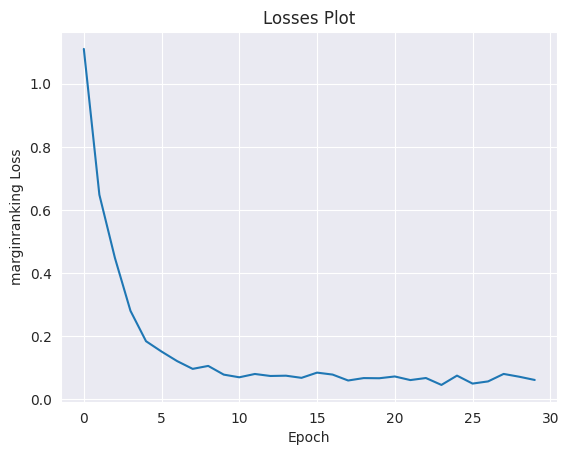

In [15]:
print_metrics(pipeline_result_transe)

In [19]:
## README if you just downgraded pykeen version to 1.9.0:
## you may have issues when loading the cached version of the dataset
## if so remove it with this command:
## rm -rf /root/.data/pykeen/datasets/countries/cache/ID
## replace ID with the foldername you see in the error (probably you may also remove the entire datasets folder in case of issues)

pipeline_result_transe_countries = pipeline(
    #training=training_labels,
    #testing=testing_labels,
    dataset='Countries',
    model='TransE',
    model_kwargs=dict(embedding_dim=80),
    random_seed=256,
    optimizer = torch.optim.Adam,
    optimizer_kwargs=dict(lr=1.0e-02),
    training_kwargs=dict(num_epochs=30),
)

#pipeline_result.save_to_directory('countries_transe')

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds


TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1110, path="/root/.data/pykeen/datasets/countries/train.txt")

hits@10 0.7916666666666666
mr 13.895833015441895
mrr 0.29157549142837524



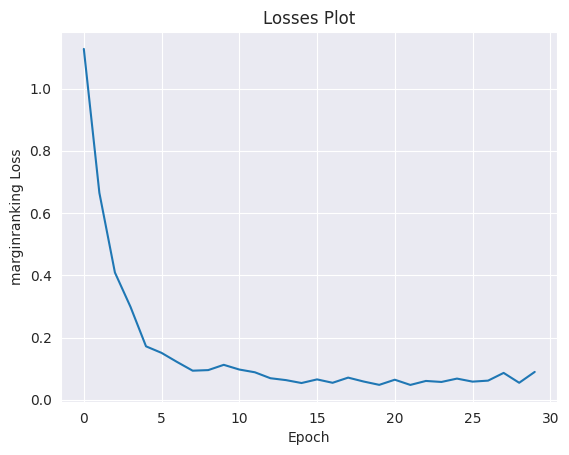

In [20]:
print_metrics(pipeline_result_transe_countries)

## Get the data directly from PyKEEN

In [21]:
from pykeen.datasets import Countries
countries = Countries()

In [22]:
countries.summarize()

Countries (create_inverse_triples=False)
Name        Entities    Relations      Triples
----------  ----------  -----------  ---------
Training    271         2                 1110
Testing     271         2                   24
Validation  271         2                   24
Total       -           -                 1158
Head         Relation    tail
-----------  ----------  -------------
afghanistan  locatedin   asia
afghanistan  locatedin   southern_asia
afghanistan  neighbor    china
afghanistan  neighbor    iran
afghanistan  neighbor    pakistan



In [23]:
countries_train_pd.query('head == "canada"')

,head,relation,tail
285,canada,locatedin,northern_america
552,canada,neighbor,united_states


## Predict

In [27]:
# canada + locatedin = ?
from pykeen import predict

predict.predict_target(
    model=pipeline_result_transe.model, head="canada", relation="locatedin", triples_factory=pipeline_result_transe.training,
)

TargetPredictions(df=     tail_id      score              tail_label
40        40  -8.130426                  canada
172      172  -8.408369        northern_america
69        69 -10.051880          eastern_europe
5          5 -10.288901                americas
216      216 -10.344877      south-eastern_asia
..       ...        ...                     ...
73        73 -14.228392       equatorial_guinea
229      229 -14.329493  svalbard_and_jan_mayen
54        54 -14.338905                 comoros
85        85 -14.434828                   gabon
74        74 -14.618053                 eritrea

[271 rows x 3 columns], factory=TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134), target='tail', other_columns_fixed_ids=(40, 0))

In [29]:
countries_train_pd.query('head == "italy"')

,head,relation,tail
37,italy,locatedin,europe
554,italy,locatedin,southern_europe
652,italy,neighbor,vatican_city
653,italy,neighbor,san_marino
654,italy,neighbor,france
655,italy,neighbor,slovenia
656,italy,neighbor,austria
657,italy,neighbor,switzerland


In [31]:
# italy + locatedin = ?
predict.predict_target(
    model=pipeline_result_transe.model, head="italy", relation="locatedin", triples_factory=pipeline_result_transe.training,
)

TargetPredictions(df=     tail_id      score                tail_label
113      113  -8.130426                     italy
224      224  -9.000551           southern_europe
77        77  -9.336396                    europe
232      232  -9.770451               switzerland
82        82  -9.984545                    france
..       ...        ...                       ...
247      247 -13.986697  turks_and_caicos_islands
167      167 -14.076013                   nigeria
231      231 -14.136805                    sweden
8          8 -14.211203                  anguilla
92        92 -14.483859                 greenland

[271 rows x 3 columns], factory=TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134), target='tail', other_columns_fixed_ids=(113, 0))

In [33]:
# italy + neighbor = ?
predict.predict_target(
    model=pipeline_result_transe.model, head="italy", relation="neighbor", triples_factory=pipeline_result_transe.training,
)

TargetPredictions(df=     tail_id      score          tail_label
113      113  -4.668548               italy
232      232  -6.647400         switzerland
131      131  -8.171041       liechtenstein
16        16  -8.577425             austria
204      204  -8.772642          san_marino
..       ...        ...                 ...
4          4 -12.998859      american_samoa
171      171 -13.008389     northern_africa
188      188 -13.128416           polynesia
216      216 -13.276852  south-eastern_asia
43        43 -13.281139      cayman_islands

[271 rows x 3 columns], factory=TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134), target='tail', other_columns_fixed_ids=(113, 1))

In [34]:
# vatican_city + neighbor = ?
predict.predict_target(
    model=pipeline_result_transe.model, head="vatican_city", relation="neighbor", triples_factory=pipeline_result_transe.training,
)

TargetPredictions(df=     tail_id      score              tail_label
259      259  -4.668548            vatican_city
113      113  -8.215549                   italy
2          2  -8.884741                 albania
204      204  -8.892269              san_marino
29        29  -8.993803  bosnia_and_herzegovina
..       ...        ...                     ...
171      171 -12.173544         northern_africa
24        24 -12.261177                  belize
242      242 -12.261781                   tonga
86        86 -12.307224                  gambia
200      200 -12.439348            saint_martin

[271 rows x 3 columns], factory=TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134), target='tail', other_columns_fixed_ids=(259, 1))

## Visualize

In [35]:
entities = list(countries.entity_to_id.keys())

In [36]:
entity_embeddings = pipeline_result_transe.model.entity_representations[0]().cpu().detach().numpy().astype('float32')
entity_embeddings.shape

(271, 80)

In [37]:
entity_embeddings

array([[ 0.07300356,  0.07488692, -0.07837651, ..., -0.15064244,
         0.17958501,  0.05356618],
       [ 0.08755191, -0.21615979,  0.12319311, ..., -0.04118925,
        -0.06594706, -0.1298867 ],
       [ 0.25091007, -0.03710277, -0.09542438, ..., -0.15413561,
        -0.00804741,  0.08515874],
       ...,
       [-0.16513623, -0.03655595, -0.11962784, ...,  0.14801304,
        -0.0187222 ,  0.16116013],
       [-0.02308927, -0.12819535, -0.12867317, ...,  0.1156863 ,
        -0.12374929,  0.0757168 ],
       [-0.02756074,  0.16890304,  0.03973317, ...,  0.01621215,
        -0.02129586,  0.07903259]], dtype=float32)

In [38]:
relation_embeddings = pipeline_result_transe.model.relation_representations[0]().cpu().detach().numpy().astype('float32')
relation_embeddings.shape

(2, 80)

In [39]:
entity_embeddings

array([[ 0.07300356,  0.07488692, -0.07837651, ..., -0.15064244,
         0.17958501,  0.05356618],
       [ 0.08755191, -0.21615979,  0.12319311, ..., -0.04118925,
        -0.06594706, -0.1298867 ],
       [ 0.25091007, -0.03710277, -0.09542438, ..., -0.15413561,
        -0.00804741,  0.08515874],
       ...,
       [-0.16513623, -0.03655595, -0.11962784, ...,  0.14801304,
        -0.0187222 ,  0.16116013],
       [-0.02308927, -0.12819535, -0.12867317, ...,  0.1156863 ,
        -0.12374929,  0.0757168 ],
       [-0.02756074,  0.16890304,  0.03973317, ...,  0.01621215,
        -0.02129586,  0.07903259]], dtype=float32)

In [40]:
from operator import sub
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def quick_plot(labels, embedding, colors = None, plot = True):
  """
  we ignore the words we are not interested to reduce the time to compute
  the 2D embeddings, but this is an approximation.
  """

  if not colors:
    colors = ['b' for _ in labels]

  X = embedding
  pca = PCA(n_components=2)

  two_d_emb = pca.fit_transform(X)

  plt.scatter(two_d_emb[:, 0], two_d_emb[:, 1], c = colors)

  for index, label in enumerate(labels):
    # annotate
    plt.annotate(label, xy=(two_d_emb[index, 0], two_d_emb[index, 1]), )

  if plot:
    plt.gcf().set_size_inches(20, 10)
    plt.show()

  return plt, pca

In [41]:
continents = set(countries_train_pd.query('relation == "locatedin"')['tail'].unique())

In [42]:
def get_color(x):
  if x in continents:
    return 'red'
  else:
    return 'blue'

colors = [get_color(ent) for ent in entities]

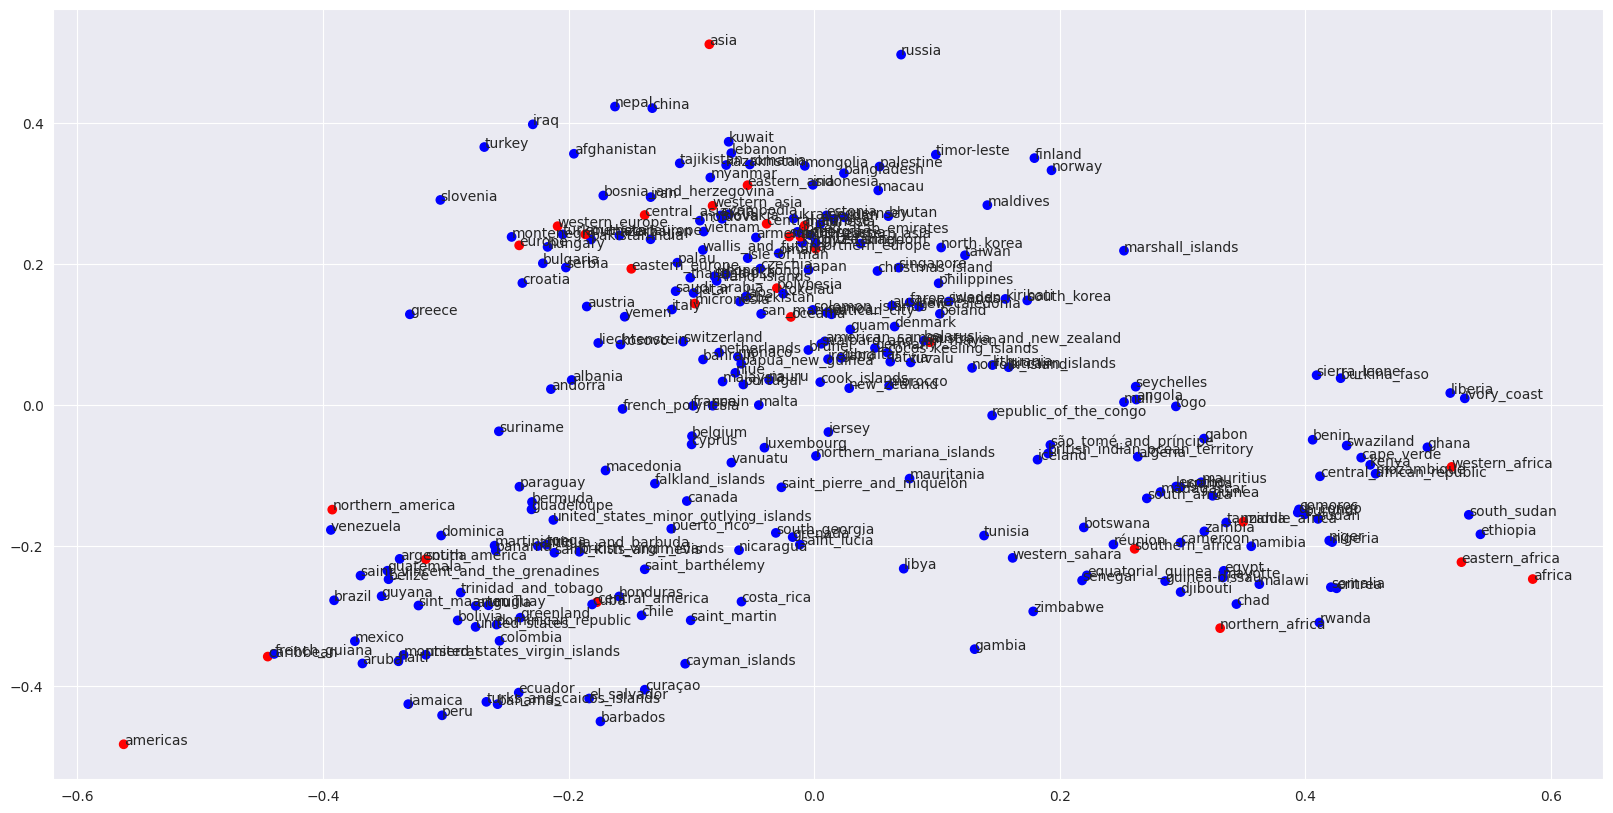

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 PCA(n_components=2))

In [43]:
quick_plot(entities, entity_embeddings, colors=colors)